In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [12]:
import os

print(os.listdir('/kaggle/input/datasets/kinzaemannn/advertising/'))

['Advertising.csv']


In [13]:
df = pd.read_csv('/kaggle/input/datasets/kinzaemannn/advertising/Advertising.csv')
# Drop the unnamed index column if present
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

print("Shape:", df.shape)
df.head(10)

Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Duplicates: 0


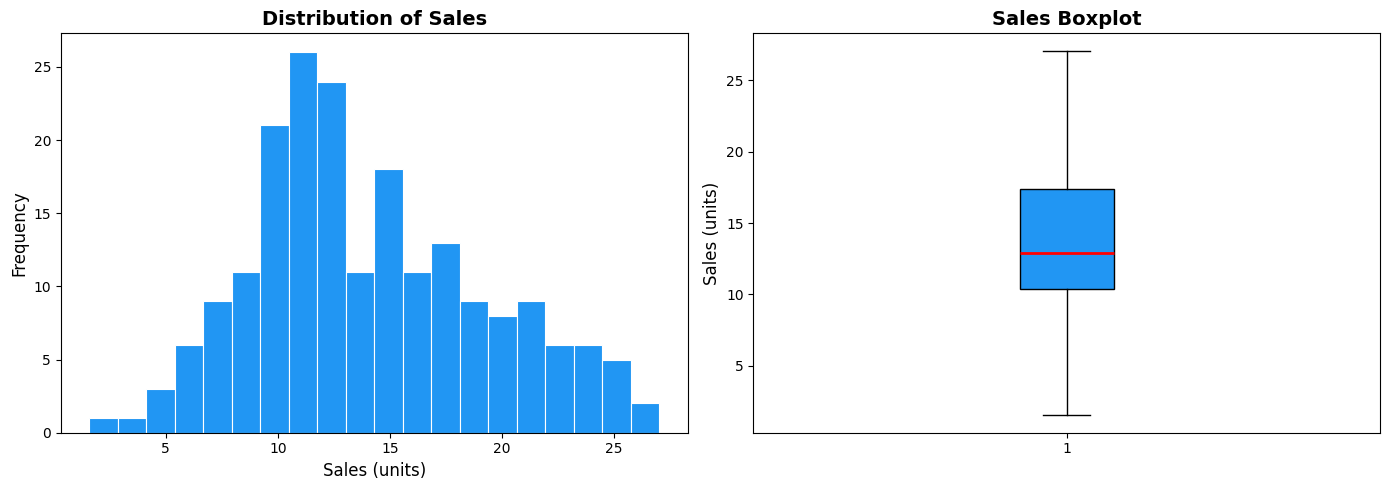

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Sales'], bins=20, color='#2196F3', edgecolor='white', linewidth=0.8)
axes[0].set_title('Distribution of Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales (units)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Boxplot
axes[1].boxplot(df['Sales'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#2196F3', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Sales Boxplot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sales (units)', fontsize=12)

plt.tight_layout()
plt.show()

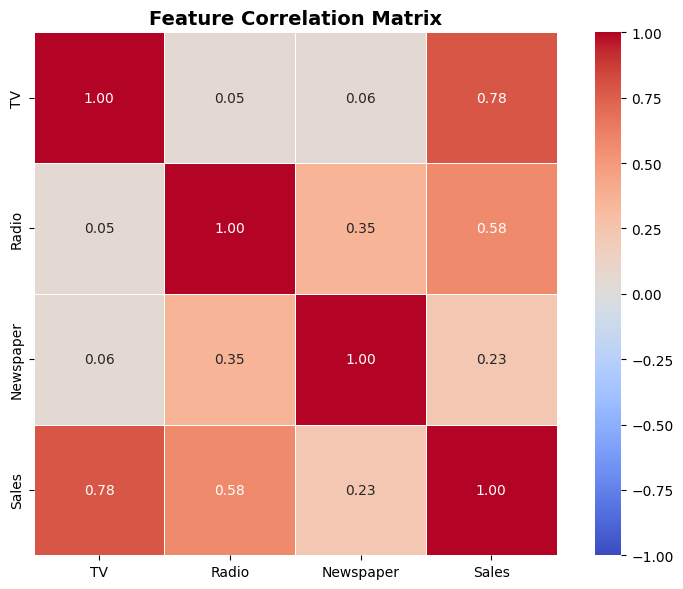

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

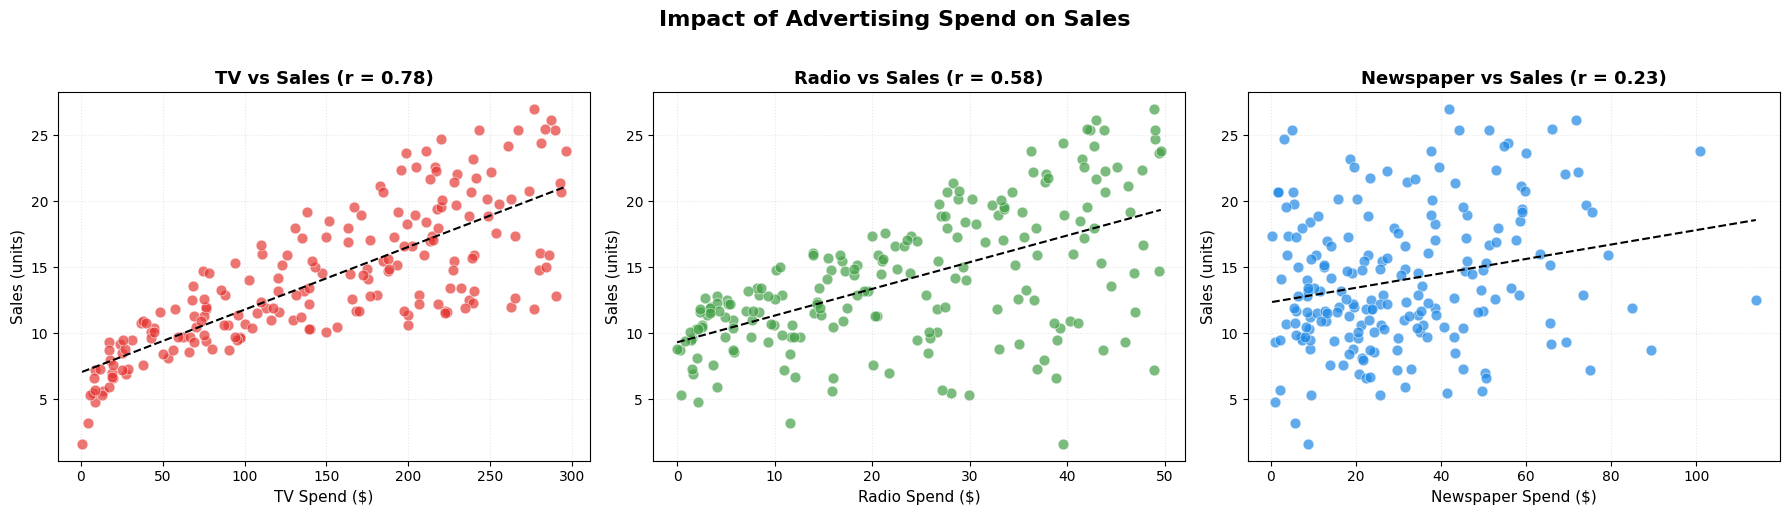

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
features = ['TV', 'Radio', 'Newspaper']
colors = ['#E53935', '#43A047', '#1E88E5']

for i, (feat, color) in enumerate(zip(features, colors)):
    axes[i].scatter(df[feat], df['Sales'], c=color, alpha=0.7,
                    edgecolors='white', linewidth=0.5, s=60)
    
    # Trend line
    z = np.polyfit(df[feat], df['Sales'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feat].min(), df[feat].max(), 100)
    axes[i].plot(x_line, p(x_line), color='black', linestyle='--', linewidth=1.5)
    
    corr = df[feat].corr(df['Sales'])
    axes[i].set_title(f'{feat} vs Sales (r = {corr:.2f})', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(f'{feat} Spend ($)', fontsize=11)
    axes[i].set_ylabel('Sales (units)', fontsize=11)
    axes[i].grid(True, linestyle=':', alpha=0.3)

plt.suptitle('Impact of Advertising Spend on Sales', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

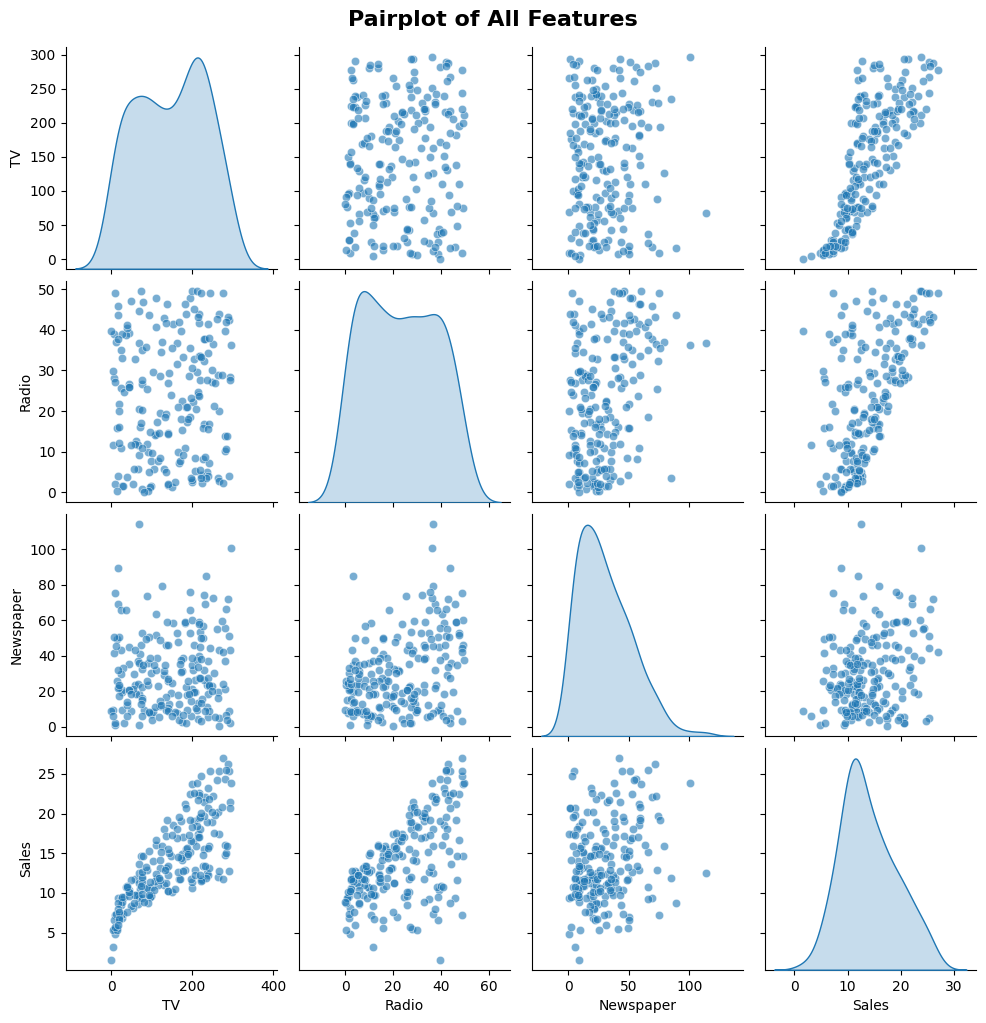

In [20]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6, 'edgecolor': 'white'})
plt.suptitle('Pairplot of All Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [21]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features (advertising spend)
y = df['Sales']                         # Target (sales)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")

Training samples: 160
Testing samples:  40


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("=== Linear Regression ===")
print(f"MAE:  {mean_absolute_error(y_test, lr_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.4f}")
print(f"R²:   {r2_score(y_test, lr_pred):.4f}")

# Show coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(f"\nIntercept: {lr.intercept_:.4f}")
print(coeff_df)

=== Linear Regression ===
MAE:  1.4608
RMSE: 1.7816
R²:   0.8994

Intercept: 2.9791
     Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("=== Random Forest ===")
print(f"MAE:  {mean_absolute_error(y_test, rf_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")
print(f"R²:   {r2_score(y_test, rf_pred):.4f}")

=== Random Forest ===
MAE:  0.6201
RMSE: 0.7686
R²:   0.9813


In [24]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("=== Gradient Boosting ===")
print(f"MAE:  {mean_absolute_error(y_test, gb_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, gb_pred)):.4f}")
print(f"R²:   {r2_score(y_test, gb_pred):.4f}")

=== Gradient Boosting ===
MAE:  0.6187
RMSE: 0.7298
R²:   0.9831


In [25]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mean_absolute_error(y_test, lr_pred),
            mean_absolute_error(y_test, rf_pred),
            mean_absolute_error(y_test, gb_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_pred)),
             np.sqrt(mean_squared_error(y_test, rf_pred)),
             np.sqrt(mean_squared_error(y_test, gb_pred))],
    'R² Score': [r2_score(y_test, lr_pred),
                 r2_score(y_test, rf_pred),
                 r2_score(y_test, gb_pred)]
})
comparison.sort_values('R² Score', ascending=False)

,Model,MAE,RMSE,R² Score
2,Gradient Boosting,0.618742,0.729782,0.983127
1,Random Forest,0.620100,0.768591,0.981284
0,Linear Regression,1.460757,1.781600,0.899438


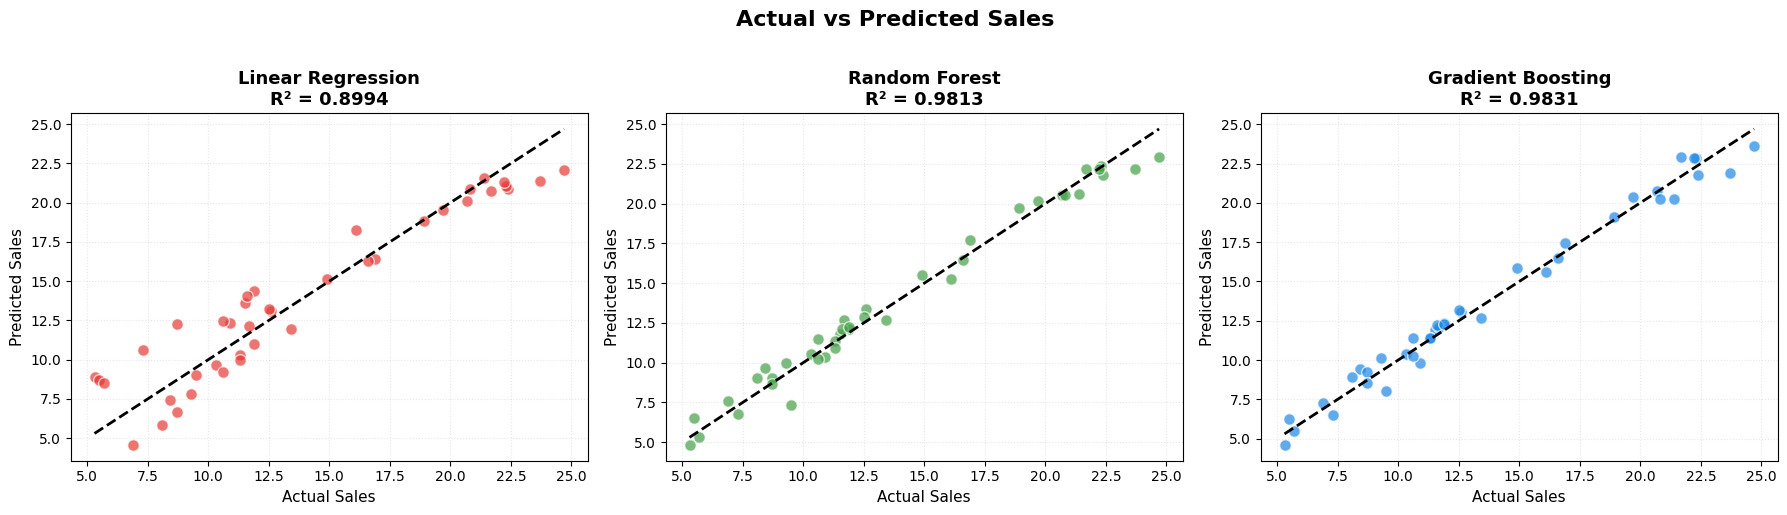

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = {'Linear Regression': lr_pred, 'Random Forest': rf_pred, 'Gradient Boosting': gb_pred}
colors = ['#E53935', '#43A047', '#1E88E5']

for i, (name, pred) in enumerate(models.items()):
    axes[i].scatter(y_test, pred, c=colors[i], alpha=0.7, edgecolors='white', s=70)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                 'k--', linewidth=2)
    r2 = r2_score(y_test, pred)
    axes[i].set_title(f'{name}\nR² = {r2:.4f}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Actual Sales', fontsize=11)
    axes[i].set_ylabel('Predicted Sales', fontsize=11)
    axes[i].grid(True, linestyle=':', alpha=0.3)

plt.suptitle('Actual vs Predicted Sales', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

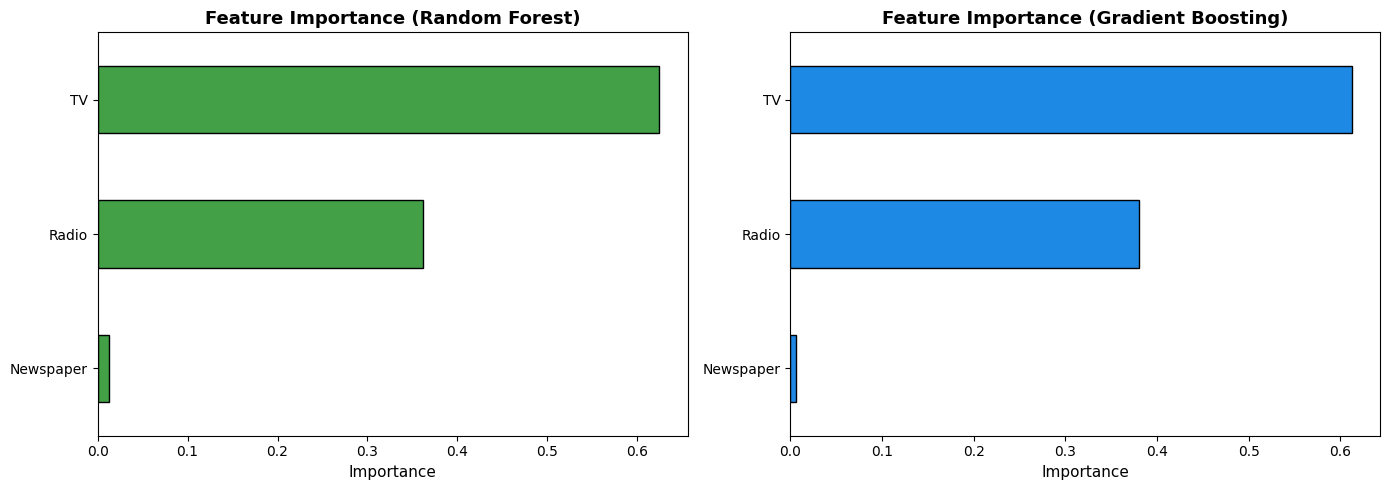

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
feat_imp_rf.plot(kind='barh', ax=axes[0], color='#43A047', edgecolor='black')
axes[0].set_title('Feature Importance (Random Forest)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Importance', fontsize=11)

# Gradient Boosting
feat_imp_gb = pd.Series(gb.feature_importances_, index=X.columns).sort_values()
feat_imp_gb.plot(kind='barh', ax=axes[1], color='#1E88E5', edgecolor='black')
axes[1].set_title('Feature Importance (Gradient Boosting)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Importance', fontsize=11)

plt.tight_layout()
plt.show()

## Key Business Insights

1. **TV advertising** has the strongest impact on sales (correlation ~0.78) — increasing TV spend directly boosts sales
2. **Radio advertising** has a moderate positive impact (correlation ~0.58)
3. **Newspaper advertising** has the weakest correlation (~0.23) — least effective channel
4. **Recommendation**: Allocate more budget to **TV and Radio**, reduce **Newspaper** spend
5. The best model achieves **R² > 0.90**, meaning advertising spend explains over 90% of sales variation